In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

**Importing the dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

**Splitting the dataset into the Training set and Test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Fitting K-NN to the Training set**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [7]:
y_pred=knn.predict(X_test)

**Making the Confusion Matrix**

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

Data Visua;ization

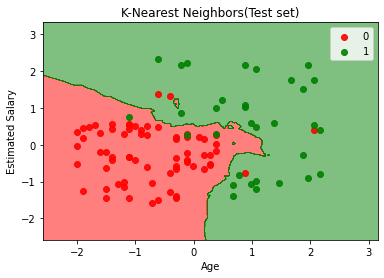

In [9]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,1].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,knn.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
              alpha=0.5,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],alpha=0.9,
              c=ListedColormap(("red","green"))(i),label=j)
plt.title("K-Nearest Neighbors(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()